In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";   

In this example, we will apply ktrain to the dataset employed in the **scikit-learn** [*Working with Text Data*](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) tutorial.  As in the tutorial, we will sample 4 newgroups to create a small multiclass text classification dataset.  Let's fetch the [20newsgroups dataset](http://qwone.com/~jason/20Newsgroups/) using **scikit-learn**.

In [3]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

# # inspect
print(train_b.keys())
print(train_b['target_names'])
print(train_b['filenames'][:5])
print(train_b['target'][:5])
print(train_b['data'][0][:300])
print(train_b['target'][0])
#print(set(train_b['target']))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
['/home/amaiya/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38440'
 '/home/amaiya/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38479'
 '/home/amaiya/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20737'
 '/home/amaiya/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20942'
 '/home/amaiya/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20487']
[1 1 3 3 3]
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also li
1


In [4]:
import ktrain
from ktrain import text

Using TensorFlow backend.


In [5]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=train_b.target_names,
                                                                      ngram_range=1, 
                                                                       maxlen=350, 
                                                                       max_features=35000)

Word Counts: 36393
Nrows: 2257
2257 train sequences
Average train sequence length: 321
x_train shape: (2257,350)
y_train shape: (2257,4)
1502 test sequences
Average test sequence length: 342
x_test shape: (1502,350)
y_test shape: (1502,4)


In [6]:
model = text.text_classifier('nbsvm', train_data=(x_train, y_train))

Is Multi-Label? False
compiling word ID features...
max_features is 27645
maxlen is 350
building document-term matrix... this may take a few moments...
rows: 1-2257
computing log-count ratios...
done.


In [7]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
2257/2257 [==============================] - 1s 293us/step - loss: 1.4131 - acc: 0.3549
Epoch 2/1024
2257/2257 [==============================] - 0s 147us/step - loss: 1.4120 - acc: 0.3567
Epoch 3/1024
2257/2257 [==============================] - 0s 150us/step - loss: 1.4098 - acc: 0.3589
Epoch 4/1024
2257/2257 [==============================] - 0s 152us/step - loss: 1.4052 - acc: 0.3624
Epoch 5/1024
2257/2257 [==============================] - 0s 150us/step - loss: 1.3961 - acc: 0.3753
Epoch 6/1024
2257/2257 [==============================] - 0s 152us/step - loss: 1.3781 - acc: 0.4072
Epoch 7/1024
2257/2257 [==============================] - 0s 146us/step - loss: 1.3429 - acc: 0.4657
Epoch 8/1024
2257/2257 [==============================] - 0s 148us/step - loss: 1.2772 - acc: 0.5782
Epoch 9/1024
2257/2257 [==============================] - 0s 150us/step - loss: 1.1628 - acc: 0.7297
Epoch 10

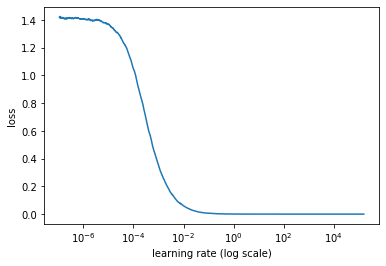

In [8]:
learner.lr_find()
learner.lr_plot()

In [9]:
learner.autofit(0.01)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Train on 2257 samples, validate on 1502 samples
Epoch 1/1024
2257/2257 [==============================] - 1s 234us/step - loss: 0.2529 - acc: 0.9313 - val_loss: 0.2315 - val_acc: 0.9301
Epoch 2/1024
2257/2257 [==============================] - 0s 214us/step - loss: 0.0155 - acc: 0.9978 - val_loss: 0.2289 - val_acc: 0.9294
Epoch 3/1024
2257/2257 [==============================] - 0s 221us/step - loss: 0.0085 - acc: 0.9996 - val_loss: 0.2292 - val_acc: 0.9294
Epoch 4/1024
2257/2257 [==============================] - 0s 221us/step - loss: 0.0064 - acc: 0.9996 - val_loss: 0.2285 - val_acc: 0.9288
Epoch 5/1024
2257/2257 [==============================] - 1s 222us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.2288 - val_acc: 0.9288
Epoch 6/1024
2257/2257 [==============================] - 0s 217us/step - loss:

In [10]:
learner.confusion_matrix(print_report=True)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       319
           1       0.95      0.95      0.95       389
           2       0.95      0.92      0.94       396
           3       0.90      0.97      0.93       398

    accuracy                           0.93      1502
   macro avg       0.93      0.93      0.93      1502
weighted avg       0.93      0.93      0.93      1502



array([[274,   4,   8,  33],
       [  4, 371,  10,   4],
       [ 10,  13, 366,   7],
       [  6,   4,   2, 386]])

In [12]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [13]:
predictor.get_classes()

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [14]:
predictor.predict(test_b.data[0:3])

['sci.med', 'sci.med', 'sci.med']

In [15]:
test_b.target[:3]

array([2, 2, 2])